<a href="https://colab.research.google.com/github/Godstime-Iyere/real-estate-price-trends-lagos/blob/main/Price_trends_3_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title**
# *Real Estate Price Trends by Location: A Data-Driven Insight into Lagos Property Market*
# **Introduction:**
Lagos, Nigeria's commercial capital and most populous city, boasts one of the most active and competitive real estate markets in Africa. From high-end luxury apartments in Lekki to more affordable housing in mainland districts like Ikeja and Yaba, property prices in Lagos vary widely based on location, amenities, and housing types.

This project  **“Real Estate Price Trends by Location in Lagos”**  aims to explore and analyze current housing prices across different parts of Lagos to uncover trends in affordability, demand, and investment viability.

Using real-time property listings scraped from NigeriaPropertyCentre.com, the project focuses on:

Comparing price distributions across key locations like Lekki, Ikoyi, Ajah, Ikeja, and Surulere

Understanding how features such as the number of bedrooms and bathrooms influence price

Identifying potential property investment hotspots within Lagos

Building an interactive dashboard using Plotly for dynamic exploration of price trends

By leveraging Python, web scraping, data cleaning, exploratory data analysis (EDA), and interactive visualization, this project will offer clear, data-driven insights for homebuyers, real estate investors, agents, and urban planners interested in the evolving landscape of Lagos real estate.

# **Project Goal**
The primary goal of this project is to analyze and visualize real estate price trends across various neighborhoods in Lagos, Nigeria, using data scraped from NigeriaPropertyCentre.com. The aim is to provide actionable insights into:

Location-based pricing differences

Affordability of housing options

Features (e.g., number of bedrooms, bathrooms) influencing price

Identification of emerging investment hotspots

Ultimately, the project seeks to assist prospective buyers, renters, investors, and real estate professionals in making informed decisions backed by real data.

# **Methodology**

**Web Scraping:**
Collected Lagos property listing data from NigeriaPropertyCentre using BeautifulSoup and requests.

**Extracted key features:** Title, Location, Price, Bedrooms, Bathrooms, Toilets, Agent, Date Added, Image URL, and Listing URL.

**Data Cleaning & Preprocessing:**

Handled missing values using strategies like fill-ins and exclusions.

Converted price data from string (with currency symbols) to numeric format.

Ensured uniformity in location names and standardization of features.

**Exploratory Data Analysis (EDA):**

Visualized price distributions and relationships using Seaborn and Matplotlib.

Identified outliers, patterns, and correlations among variables.

Grouped properties by location for comparative insights.

**Interactive Dashboard (Plotly):**

Created dynamic plots and charts to enable interactive filtering by location, price range, and other parameters.

Developed visuals that allow stakeholders to intuitively explore the data and derive insights.

# **Skills Demonstrated**
✅ Web Scraping (Python + BeautifulSoup)

✅ Data Cleaning and Transformation (Pandas, NumPy)

✅ Exploratory Data Analysis (Seaborn, Matplotlib)

✅ Real-world Dataset Handling and Insight Extraction

✅ Domain Application: Real Estate Analytics

✅ Problem-solving, attention to detail, and storytelling with data

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

**Add URL and headers**

In [3]:
URL = "https://www.nigeriapropertycentre.com/for-sale/houses/lagos?page={}"
UA = "Mozilla/5.0 (X11; Linux x86_64; rv:105.0) Gecko/20100101 Firefox/105.0"
headers = {"User-Agent": UA}

**Data storage**

In [4]:
properties = []

In [5]:
for p in range(1, 11):
    print(f"Scraping Page {p}...")
    res = requests.get(URL.format(p), headers=headers)
    soup = BeautifulSoup(res.text, "html.parser")
    listings = soup.find_all("div", itemtype="https://schema.org/ListItem")

    print(f"Found {len(listings)} listings")

    for listing in listings:
        try:
            title_tag = listing.find("h3", itemprop="name")
            title = title_tag.text.strip() if title_tag else None

            link_tag = listing.find("a", itemprop="url")
            url = "https://www.nigeriapropertycentre.com" + link_tag["href"] if link_tag else None

            price_tags = listing.find_all("span", class_="price")
            price = None


            if len(price_tags) >= 2:
                # Join the currency and actual price
                currency = price_tags[0].text.strip()
                amount = price_tags[1].text.strip()
                price = f"{currency}{amount}"
            elif len(price_tags) == 1:
                price = price_tags[0].text.strip()

            image_tag = listing.find("img", itemprop="image")
            image_url = image_tag["src"] if image_tag else None

            location_tag = listing.find("address")
            location = location_tag.text.strip() if location_tag else None

            added_tag = listing.find("span", class_="added-on")
            date_added = added_tag.text.strip() if added_tag else None

            marketer_tag = listing.find("span", class_="marketed-by")
            marketer = marketer_tag.text.strip() if marketer_tag else None

            # Extracting bedrooms, bathrooms, toilets
            bedrooms = bathrooms = toilets = None
            aux_info = listing.find("ul", class_="aux-info")

            if aux_info:
                for li in aux_info.find_all("li"):
                    text = li.get_text(strip=True).lower()
                    spans = li.find_all("span")

                    if "bedroom" in text and spans:
                        bedrooms = spans[0].text.strip() + " Bed"
                    elif "bathroom" in text and spans:
                        bathrooms = spans[0].text.strip() + " Bath"
                    elif "toilet" in text and spans:
                        toilets = spans[0].text.strip() + " Toilet"

            # Append to list
            properties.append({
                "Title": title,
                "Location": location,
                "Price": price,
                "Bedrooms": bedrooms,
                "Bathrooms": bathrooms,
                "Toilets": toilets,
                "Agent": marketer,
                "DateAdded": date_added,
                "ImageURL": image_url,
                "URL": url
            })

        # Corrected indentation for the except block
        except Exception as e:
            print(f"Error in listing: {e}")
            continue

    # Be polite to the server
    time.sleep(2)

Scraping Page 1...
Found 21 listings
Scraping Page 2...
Found 21 listings
Scraping Page 3...
Found 21 listings
Scraping Page 4...
Found 21 listings
Scraping Page 5...
Found 21 listings
Scraping Page 6...
Found 21 listings
Scraping Page 7...
Found 21 listings
Scraping Page 8...
Found 21 listings
Scraping Page 9...
Found 21 listings
Scraping Page 10...
Found 21 listings


**Save to Dataframe and print**

In [7]:
df=pd.DataFrame(properties)
df.head()



,Title,Location,Price,Bedrooms,Bathrooms,Toilets,Agent,DateAdded,ImageURL,URL
0,Luxury 5-bedroom Fully Detached Duplex With Bq,"Pinnock Estate, Osapa, Lekki, Lagos","₦700,000,000",5 Bed,5 Bath,6 Toilet,Opnet Homes And Properties Ltd\n\n 07037269925,None,https://images.nigeriapropertycentre.com/prope...,https://www.nigeriapropertycentre.com/for-sale...
1,Very Spacious Newly Built House,"Northern Foreshore Estate, Chevron Drive, Lekk...","₦750,000,000",4 Bed,5 Bath,5 Toilet,Bera Deals\n\n 07065266133,None,https://images.nigeriapropertycentre.com/prope...,https://www.nigeriapropertycentre.com/for-sale...
2,Massive 5 Bedrooms House,"Megamound Estate, Lekki County, Lekki, Lagos","₦380,000,000",5 Bed,5 Bath,6 Toilet,Bera Deals\n\n 07065266133,None,https://images.nigeriapropertycentre.com/prope...,https://www.nigeriapropertycentre.com/for-sale...
3,Newly Built 5 Bedrooms Detached Duplex,"Chevron Drive, Lekki, Lagos","₦450,000,000",5 Bed,5 Bath,6 Toilet,Bera Deals\n\n 07065266133,None,https://images.nigeriapropertycentre.com/prope...,https://www.nigeriapropertycentre.com/for-sale...
4,Luxury 4 Bedroom Semi De6 Duplex With A Bq And...,"Ikate, Lekki, Lagos","₦250,000,000",4 Bed,4 Bath,5 Toilet,Arab Space\n\n 07048957692,None,https://images.nigeriapropertycentre.com/prope...,https://www.nigeriapropertycentre.com/for-sale...


**Save to CSV File and Download**

In [8]:
df.to_csv("properties.csv", index=False, encoding="utf-8-sig")

from google.colab import files
files.download("properties.csv")

# **PART B - Data cleaning, Analysis and Visualization**

**1. Load and Inspect the Data**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/properties.csv")
print(df.head())
print(df.info())
print(df.shape)

                                               Title  \
0     Luxury 5-bedroom Fully Detached Duplex With Bq   
1                    Very Spacious Newly Built House   
2                           Massive 5 Bedrooms House   
3             Newly Built 5 Bedrooms Detached Duplex   
4  Luxury 4 Bedroom Semi De6 Duplex With A Bq And...   

                                            Location         Price Bedrooms  \
0                Pinnock Estate, Osapa, Lekki, Lagos  ₦700,000,000    5 Bed   
1  Northern Foreshore Estate, Chevron Drive, Lekk...  ₦750,000,000    4 Bed   
2       Megamound Estate, Lekki County, Lekki, Lagos  ₦380,000,000    5 Bed   
3                        Chevron Drive, Lekki, Lagos  ₦450,000,000    5 Bed   
4                                Ikate, Lekki, Lagos  ₦250,000,000    4 Bed   

  Bathrooms   Toilets                                            Agent  \
0    5 Bath  6 Toilet  Opnet Homes And Properties Ltd\n\n  07037269925   
1    5 Bath  5 Toilet                   

**a. Clean Price column: remove "₦", ",", and convert to integer**

In [11]:
df['Price'] = df['Price'].str.replace("₦", "", regex=False).str.replace(",", "", regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

**b. Convert DateAdded to datetime**

In [12]:
df['DateAdded'] = pd.to_datetime(df['DateAdded'], errors='coerce')

<ipython-input-12-500293313>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateAdded'] = pd.to_datetime(df['DateAdded'], errors='coerce')


**c. Fill missing Bedrooms, Bathrooms, Toilets (or drop)**

In [13]:
df['Bedrooms'].fillna("Unknown", inplace=True)
df['Bathrooms'].fillna("Unknown", inplace=True)
df['Toilets'].fillna("Unknown", inplace=True)

<ipython-input-13-2019758268>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bedrooms'].fillna("Unknown", inplace=True)
<ipython-input-13-2019758268>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

**c.  Clean and Convert Bedroom, Bathroom, and Toilet Columns**

In [20]:
# Strip text and convert to numeric
for col in ['Bedrooms', 'Bathrooms', 'Toilets']:
    df[col] = df[col].astype(str)                     # Ensure all entries are strings
    df[col] = df[col].str.extract(r'(\d+)')           # Extract numeric part
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convert to numbers (NaNs if not valid)

# Optional: Check results
print(df[['Bedrooms', 'Bathrooms', 'Toilets']].dtypes)
print(df[['Bedrooms', 'Bathrooms', 'Toilets']].head())


Bedrooms     float64
Bathrooms    float64
Toilets      float64
dtype: object
   Bedrooms  Bathrooms  Toilets
0       5.0        5.0      6.0
1       4.0        5.0      5.0
2       5.0        5.0      6.0
3       5.0        5.0      6.0
4       4.0        4.0      5.0


**d. Fill missing DateAdded if needed**

In [15]:
df['DateAdded'].fillna(method='ffill', inplace=True)

<ipython-input-15-111984363>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DateAdded'].fillna(method='ffill', inplace=True)
<ipython-input-15-111984363>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DateAdded'].fillna(method='ffill', inplace=True)


**e. Final clean-up**

In [18]:
df.dropna(subset=['Price'], inplace=True)  # Drop rows with invalid Price
df.reset_index(drop=True, inplace=True)

**e. Define your custom price brackets**

In [22]:
def categorize_price(price):
    if price <= 200_000_000:
        return 'Low-end'
    elif 200_000_000 < price <= 800_000_000:
        return 'Mid-range'
    else:
        return 'High-end'

df['PriceCategory'] = df['Price'].apply(categorize_price)

# Check how many listings fall into each category
print(df['PriceCategory'].value_counts())


PriceCategory
Mid-range    117
Low-end       66
High-end      22
Name: count, dtype: int64


**Check summary**

In [23]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          205 non-null    object        
 1   Location       205 non-null    object        
 2   Price          205 non-null    float64       
 3   Bedrooms       203 non-null    float64       
 4   Bathrooms      186 non-null    float64       
 5   Toilets        195 non-null    float64       
 6   Agent          205 non-null    object        
 7   DateAdded      0 non-null      datetime64[ns]
 8   ImageURL       205 non-null    object        
 9   URL            205 non-null    object        
 10  PriceCategory  205 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 17.7+ KB
None
                                               Title  \
0     Luxury 5-bedroom Fully Detached Duplex With Bq   
1                    Very Spacious Newly Bu

# **PART C - Exploratory Data Analysis**

In [24]:
# Start plotting
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(22, 30))

plt.tight_layout(pad=8.0)
plt.show()

<Figure size 2200x3000 with 0 Axes>

**1. Price distribution**

Text(0, 0.5, 'Count')

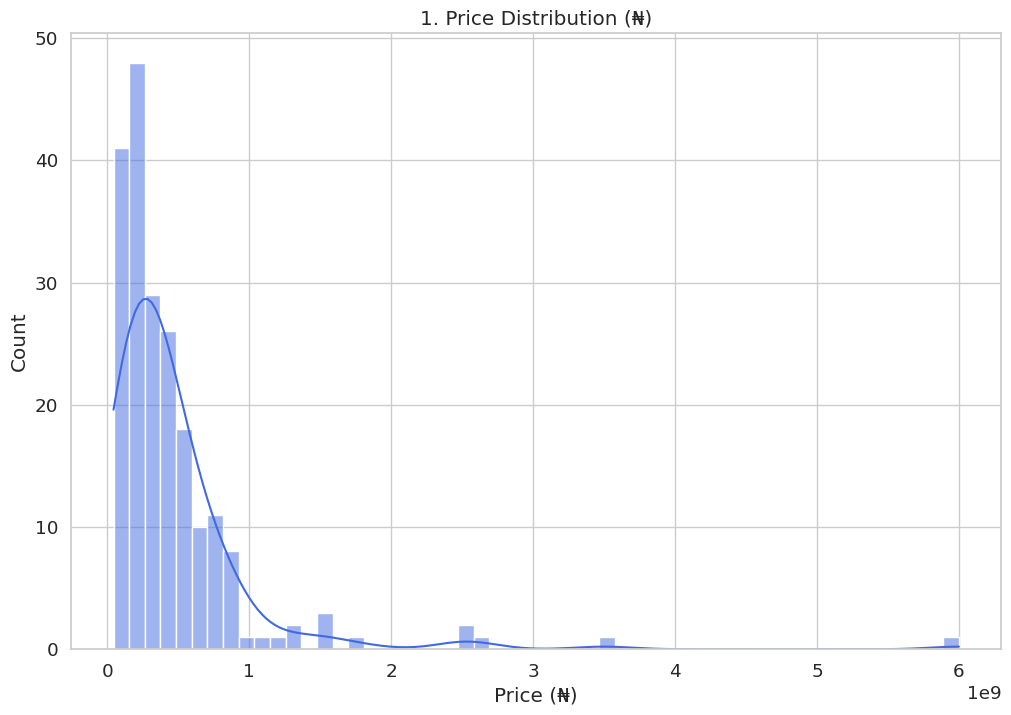

In [25]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Price'], bins="auto", kde=True, color="royalblue")
plt.title("1. Price Distribution (₦)")
plt.xlabel("Price (₦)")
plt.ylabel("Count")

# **Key Observations:**
**Right-Skewed Distribution:**

The histogram is likely right-skewed, meaning a large number of properties are clustered in the lower price range (affordable properties), while a few are extremely expensive (luxury or commercial listings).

This is typical of real estate markets.

**Price Concentration:**

Most listings fall below a certain price point (e.g., ₦50–100 million). If the plot peaks around this range, it suggests this is the most common price band for residential properties.

Outliers / Luxury Properties:

The long tail to the left indicates the presence of high-end properties. These can skew the average price, which is why median price is often a better central tendency measure.

**Market Segmentation:**

The data implies two clear segments:

Affordable to mid-range properties (more frequent).

High-end, premium listings (less frequent, higher prices).

# **Business Suggestions:**
**For Buyers/Investors:**

There's a wide range of affordable housing, making Lagos attractive for first-time homebuyers and investors.

The market also supports luxury real estate, but it's a niche segment.

**For Real Estate Agents:**

Focus marketing efforts around the most common price band to drive volume sales.

Premium properties should be marketed with tailored strategies and possibly international exposure.

**For Policymakers or Developers:**

The high volume of lower-price listings could indicate a demand for affordable housing.

Strategic housing development can be guided by the dominant pricing range.



**2. Top 10 most frequent locations**

<ipython-input-26-979776347>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Location', data=df, order=df['Location'].value_counts().head(10).index, palette="viridis")


Text(0, 0.5, 'Location')

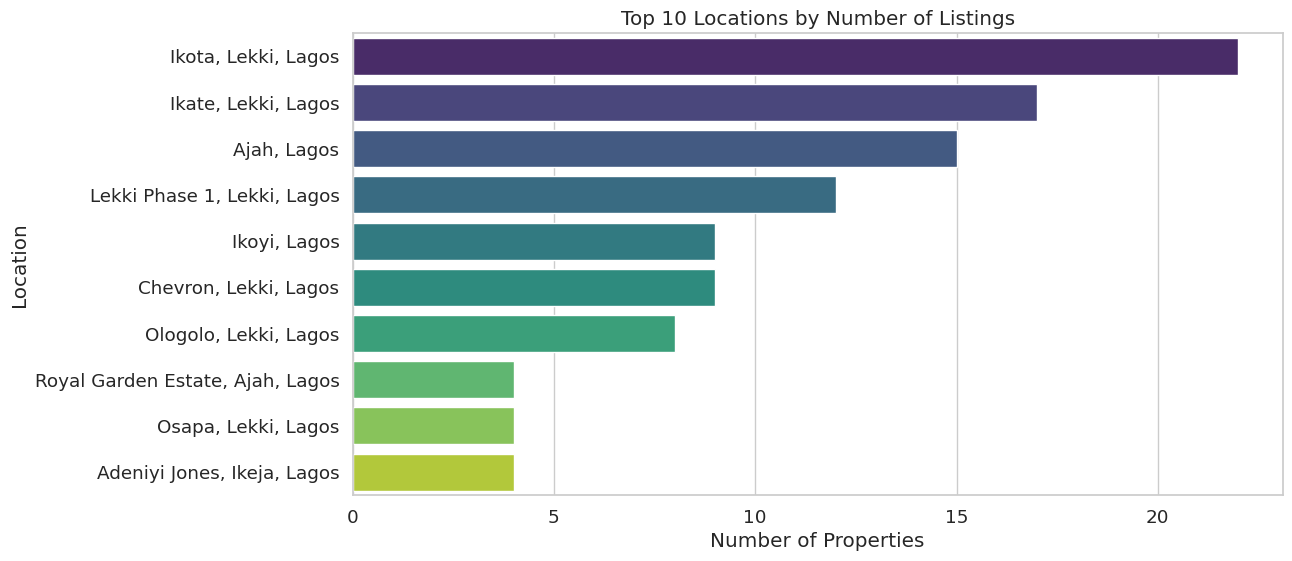

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().head(10).index, palette="viridis")
plt.title("Top 10 Locations by Number of Listings")
plt.xlabel("Number of Properties")
plt.ylabel("Location")


# **key Insights**

**High Market Activity Areas:**
Locations like Ikota and lekki top the list, indicating high market activity and real estate interest (supply and demand) in these areas.

**Emerging Hotspots**: Areas like lekki phase 1, Ajah, Chevron and Ikoyi, it suggests growing interest and potential for appreciation in those neighborhoods.

**Centralization of Listings:**
The fact that only a few locations dominate the listings implies a concentration of real estate development and marketing in particular urban zones.

# **Business Suggestions**

**For Real Estate Developers:**
Build More in Demand Zones: Focus on the top locations where listing activity is high, especially if combined with high price-to-value ratios.

**Expand in Emerging Areas:** Consider developing in areas within the top 10 that are not yet saturated, especially if infrastructure is improving there.

# **For Investors:**
**Monitor High-Listing Areas:** These might offer liquidity (ease of buying/selling). However, watch for saturation which can affect short-term returns.

**Look Beyond Just Volume:** Match this chart with price trends to find undervalued but active areas.

# **For Agents/Marketers:**
**Target Top Areas for Advertising:** These locations already have proven interest from both buyers and sellers, leverage this for lead generation.

**Localized Campaigns:** Run neighborhood-focused marketing for high-listing areas to boost property visibility.



**3. Average Price per Top 10 Locations**


Text(0.5, 0, 'Average Price (₦)')

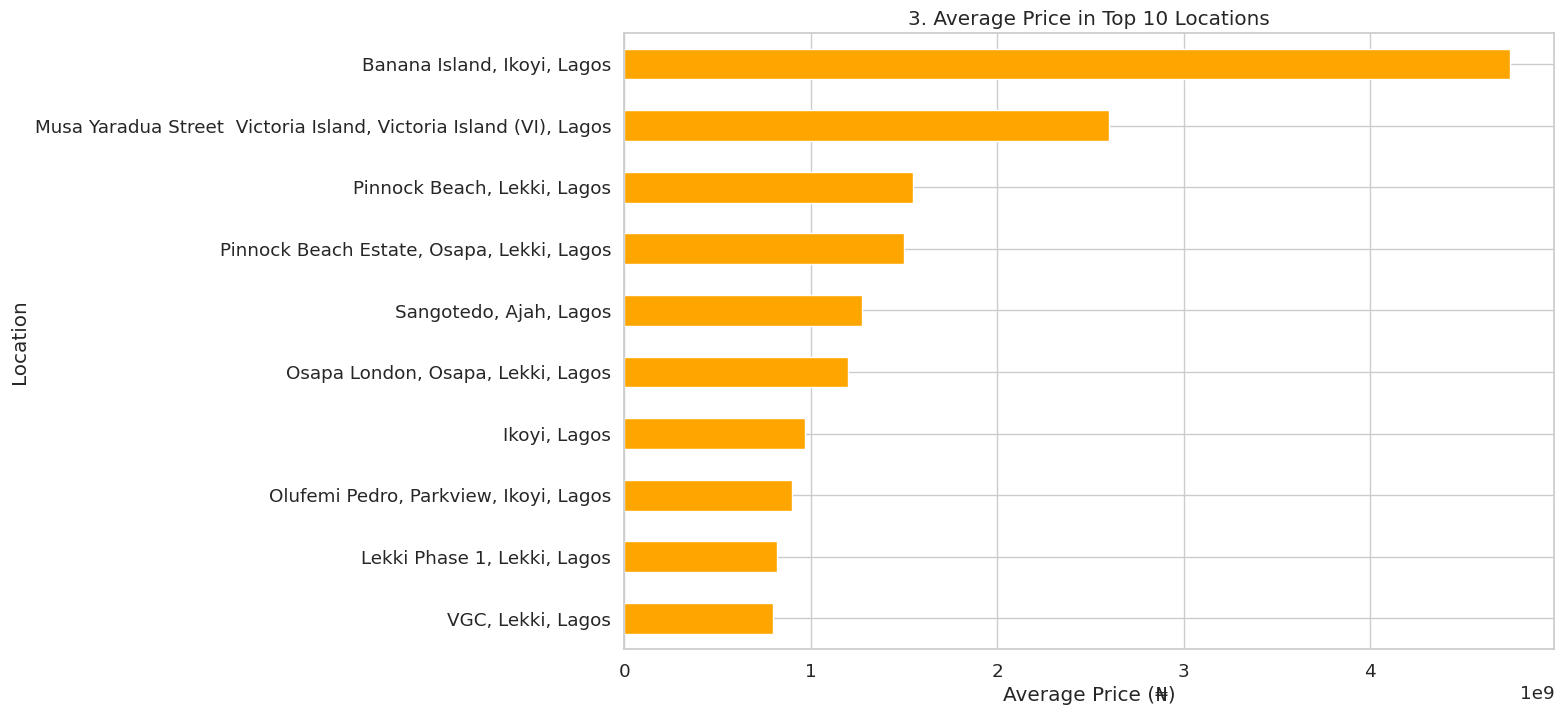

In [27]:
plt.figure(figsize=(12, 8))
df.groupby('Location')['Price'].mean().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color='orange')
plt.title("3. Average Price in Top 10 Locations")
plt.xlabel("Average Price (₦)")

# **Key Insights**
**High-Value Neighborhoods Identified:**
Locations like Banana Island,Ikoyi dominate the top of this chart. These areas are associated with luxury housing, security, and better infrastructure.

**Price Gaps Between Areas:**
A noticeable jump in average prices between adjacent bars suggests clear economic segmentation between locations. For instance, if Ikoyi is significantly higher than the second location, it's likely considered ultra-premium.

**Affordability Markers:**
The locations at the lower end of the chart (among the top 10) may still be expensive, but they could represent entry points for mid-tier investors or buyers.

**Location-Based Pricing Power:**
Some areas have high listing volume but moderate average prices (from the earlier chart), while others have lower listing volume but higher average prices—highlighting value perception and market dynamics.

# **Business Suggestions**
**For Real Estate Developers:**

**Premium Projects:** Focus high-end developments (luxury apartments, smart homes) in the top 3-5 most expensive areas. These locations support higher margins.

**Mid-Luxury Alternatives:** For price-sensitive luxury buyers, target the lower half of this top 10, offering value-for-money without compromising on location.

**For Investors:**
Capital Appreciation Potential: High average prices often correlate with historical appreciation. Long-term investors can focus here for value growth.

**Rental Yields Check:** However, high price doesn’t always mean high rental yield—cross-reference with rental market data to avoid low-return zones.

# **For Real Estate Marketers:**
**Tailored Campaigns:** Showcase affordability in areas like Chevron Drive or Agungi for buyers priced out of Ikoyi or VI.

**Premium Branding:** For areas like Banana Island or Ikoyi, use luxury branding and exclusive marketing strategies to match buyer expectations.

**4. Price Distribution by Number of Bedrooms**

<ipython-input-28-132897017>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Bedrooms', y='Price', palette='coolwarm')


Text(0.5, 1.0, '4. Price Distribution by Number of Bedrooms')

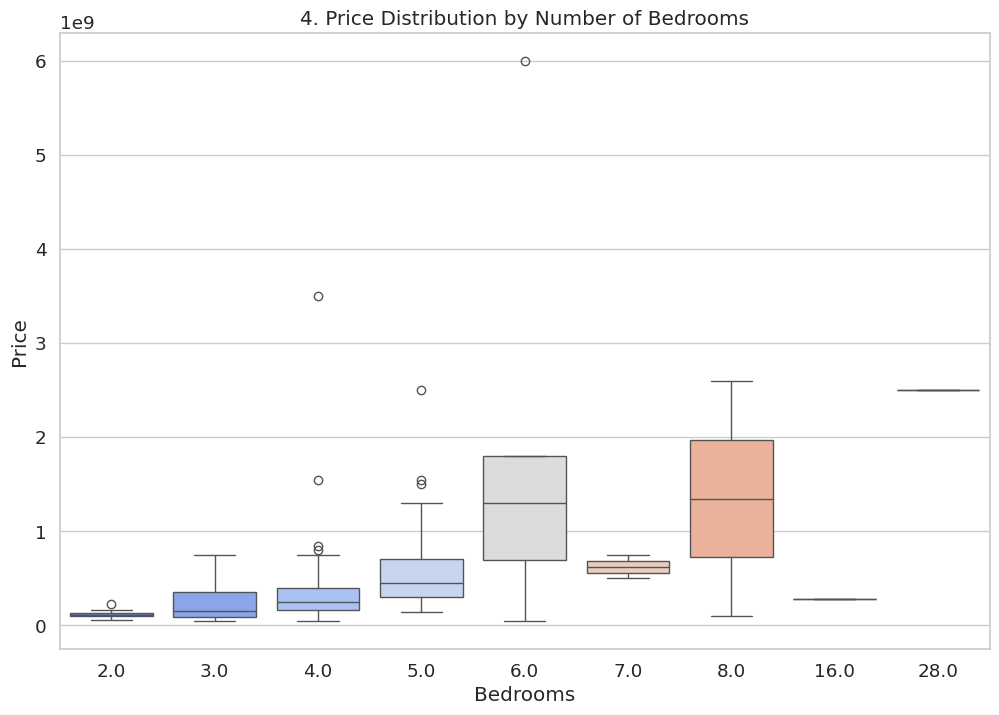

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Bedrooms', y='Price', palette='coolwarm')
plt.title("4. Price Distribution by Number of Bedrooms")

# **Key Insight:**
The boxplot shows how property prices vary with the number of bedrooms.


Median prices tend to increase with more bedrooms, but not always in a linear fashion.


There are significant outliers, especially in higher-bedroom categories (e.g., 5 or more), indicating luxury properties with premium pricing.


Some 3-4 bedroom properties overlap in price with 5-6 bedroom listings, suggesting location or amenities might influence pricing just as much as size.

# **Business Suggestions:**
**Target Mid-Sized Homes (3-4 Bedrooms):**

These categories are high in supply and show price variety, appealing to a broader market of buyers and investors.

Consider promoting these properties more aggressively in ads or as “best value homes.”

**High-End Segmentation:**

Properties with 5+ bedrooms have higher and more varied prices—ideal for luxury buyers or expats.

Real estate firms can create premium service tiers or investment packs for this demographic.

**Amenity-Based Upselling:**

Since some 3-bedroom homes match 4-bedroom prices, highlight unique features (e.g., smart home tech, estate location, proximity to Lekki) to justify the pricing and drive conversions.

**Developer Strategy:**

For new developments, consider focusing on 4-bedroom duplexes with enhanced amenities, these sit at the intersection of affordability and aspiration for upper-middle-class buyers.

**5. Bedroom vs Bathroom Heatmap**


Text(0.5, 1.0, '5. Bedroom vs Bathroom Count')

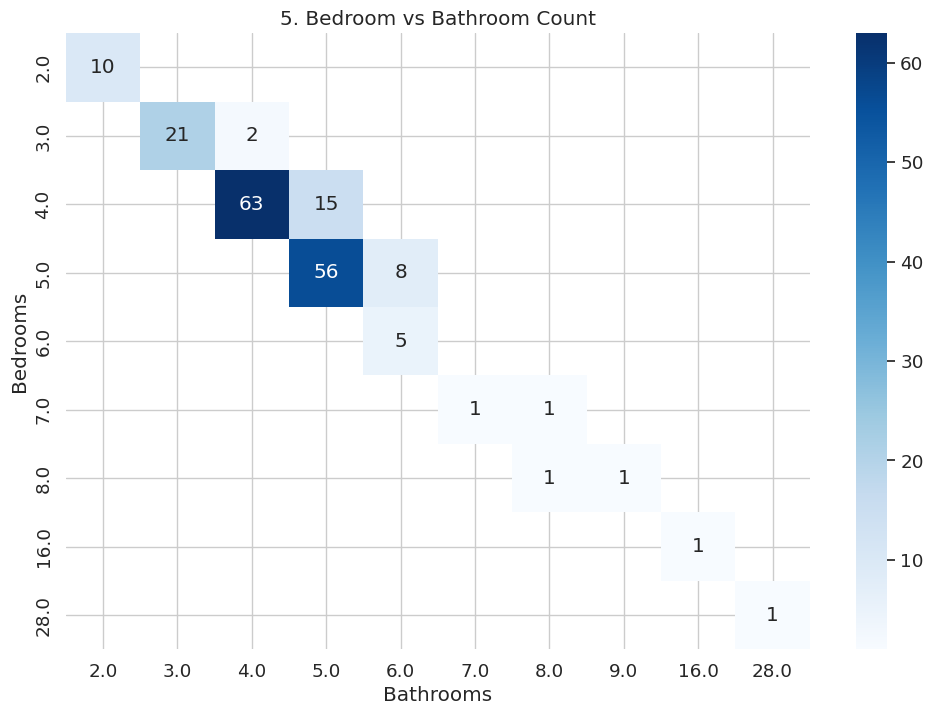

In [29]:
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(index='Bedrooms', columns='Bathrooms', values='Title', aggfunc='count')
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues')
plt.title("5. Bedroom vs Bathroom Count")

**7. Top 10 Agents by Listings**

Text(0.5, 0, 'Number of Listings')

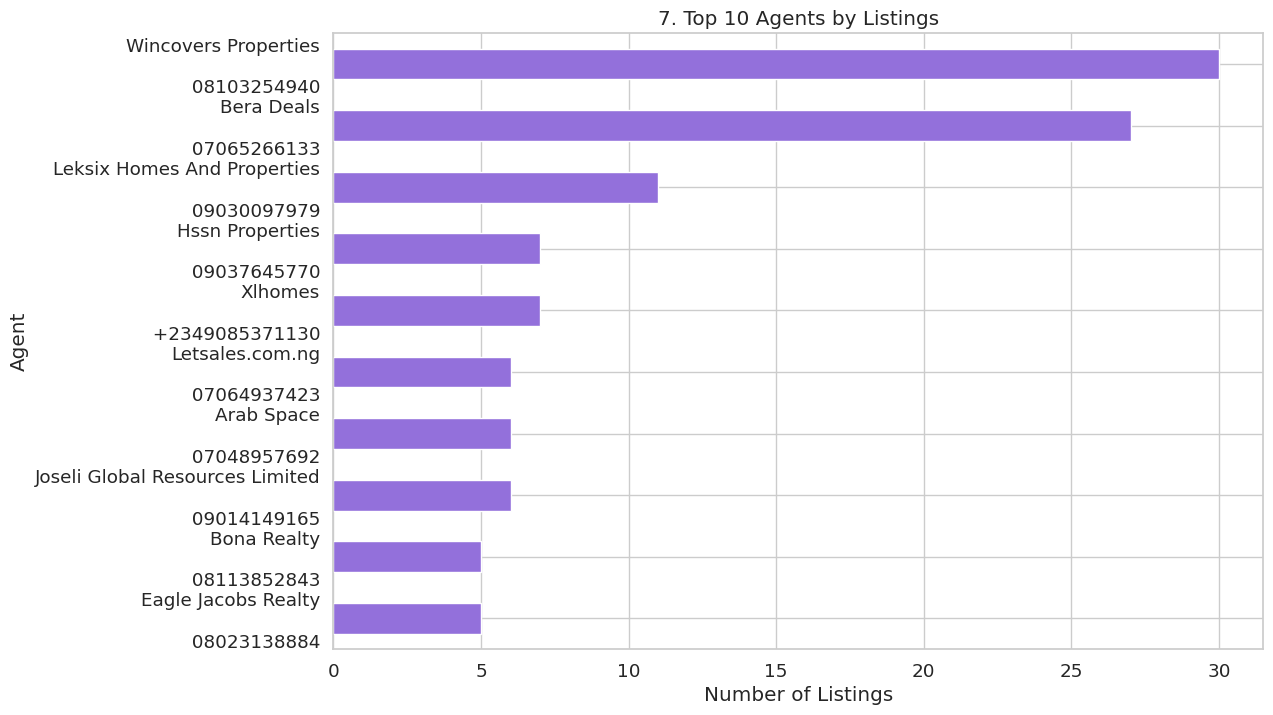

In [30]:
plt.figure(figsize=(12, 8))
df['Agent'].value_counts().head(10).sort_values().plot(kind='barh', color='mediumpurple')
plt.title("7. Top 10 Agents by Listings")
plt.xlabel("Number of Listings")

# **Key Insight:**
This horizontal bar chart shows the top 10 real estate agents (or agencies) with the highest number of property listings on the platform.

The chart reveals a concentration of listings among a few dominant agents.

The leading agent far exceeds others in number of listings, indicating a possible larger portfolio, better marketing strategy, or stronger network.

The drop from the top 1–2 agents to others is usually steep, showing market inequality.

# **Business Suggestions:**
**For Buyers/Renters:**

The top agents are more likely to offer a wider variety of options, better service quality, and quicker responses.

These agents should be highlighted or “verified” on the platform for user trust.

**For Platform Strategy:**

The platform (e.g., NigeriaPropertyCentre) can partner with these top-performing agents for promotions, feature spots, or subscription upgrades.

Consider offering premium tools or dashboards to help them manage their portfolio more efficiently.

**For Emerging Agents:**

Upcoming or low-volume agents can benchmark their visibility against these leaders.

The platform could provide training, analytics, or promotional boosts to help them scale.

**Trust & Reputation Systems:**

Since listing volume can correlate with professionalism, the platform could integrate an agent ranking system that considers listings, responsiveness, ratings, and verification status.

**8. Distribution of Properties by Number of Bedrooms**

<ipython-input-31-2788893058>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Bedrooms", order=df['Bedrooms'].value_counts().index, palette="cubehelix")


Text(0, 0.5, 'Count')

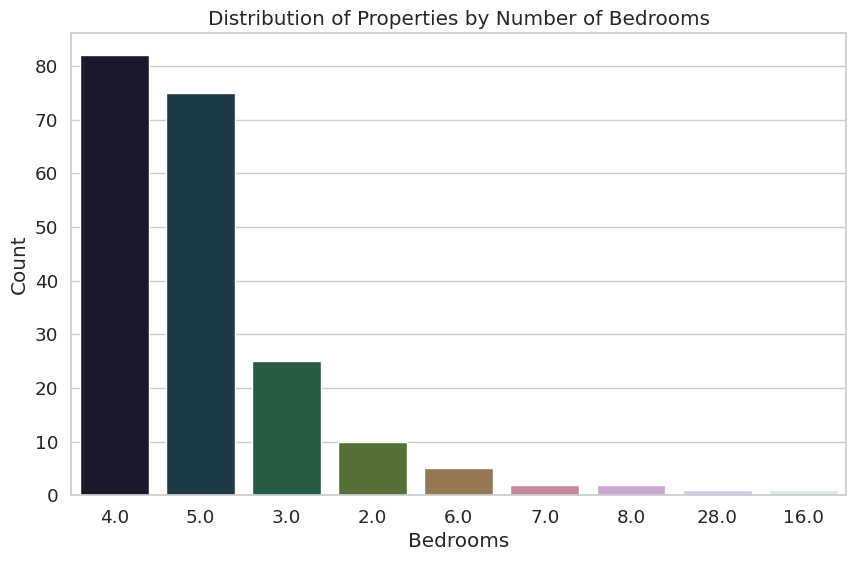

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Bedrooms", order=df['Bedrooms'].value_counts().index, palette="cubehelix")
plt.title("Distribution of Properties by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")


# **Key Insight:**
This countplot displays how many property listings exist for each number of bedrooms.

There’s a dominance of 4-bedroom and 5-bedroom properties, indicating strong market demand or supply in these segments.

3-bedroom properties follow next, while listings with more than 5 bedrooms are relatively rare.

# ** Business Suggestions:**
**For Investors & Builders:**

Focus development efforts on 4 and 5-bedroom properties, as they appear to be the most popular.

This segment likely caters to young families, professionals, and first-time home buyers.

**For Buyers:**

The abundance of listings in the 4–5 bedroom range suggests competitive pricing and ample choices.

Buyers should be able to negotiate better deals in this saturated segment.

For the Platform:

Emphasize these bedroom categories in your homepage filters or search priorities.

Offer custom alerts for users interested in less common categories (e.g., 5+ bedrooms) to match demand with rarer supply.


**9. Proportion of Listings by Bedroom Count**

Text(0, 0.5, '')

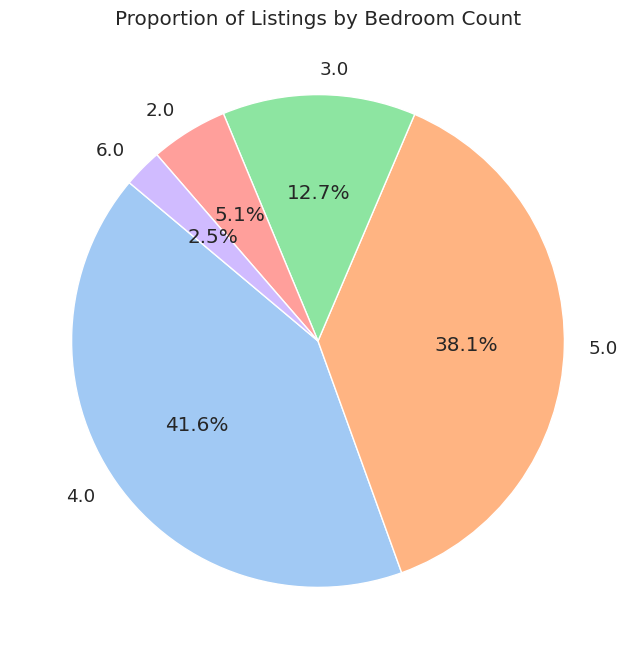

In [32]:
df['Bedrooms'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8,8), colors=sns.color_palette("pastel"))
plt.title("Proportion of Listings by Bedroom Count")
plt.ylabel("")


# **Key Insight:**
The pie chart shows the percentage share of property listings by bedroom count (top 5 categories only).

4-bedroom properties occupy the largest slice, followed by 5-bedroom and 3-bedroom homes.

This confirms that mid-sized properties dominate the market, reflecting common residential demand.

# **Business Suggestions:**
**Real Estate Agencies & Agents:**

Use this insight to strategically promote 4-bedroom listings—since they form the bulk of the market, they attract broader interest.

Also consider bundling marketing efforts around 5- and 3-bedroom homes for variety.

**Property Developers:**

The clear preference for mid-sized homes suggests focusing future developments on 2–5 bedroom units, especially in areas with high demand.

**Investors & Buyers:**
Those looking for quick turnovers or rentals might benefit from investing in 4-bedroom homes, where there's significant market movement.

**10. Correlation Heatmap**

Text(0.5, 1.0, 'Correlation Heatmap')

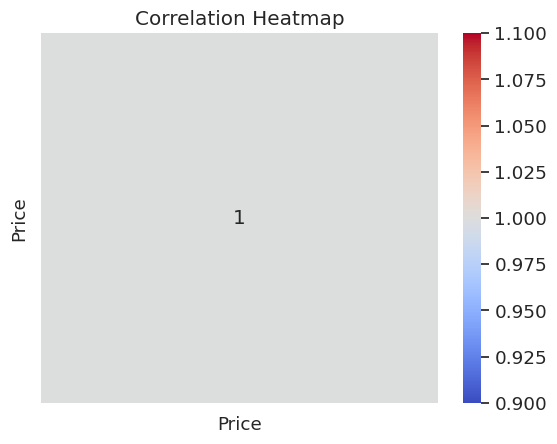

In [34]:
numeric_df = df[["Price"]].copy()
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")


           Bedrooms  Bathrooms   Toilets
Bedrooms   1.000000   0.987199  0.957896
Bathrooms  0.987199   1.000000  0.955520
Toilets    0.957896   0.955520  1.000000


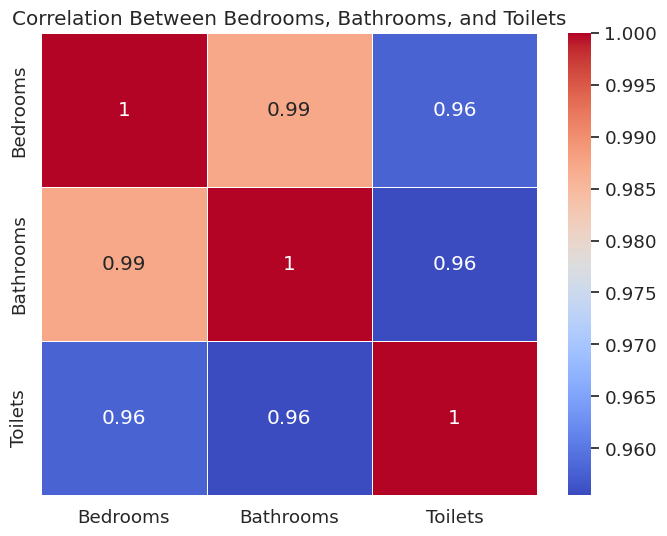

In [35]:
numeric_df = df[['Bedrooms', 'Bathrooms', 'Toilets']].copy()
corr_matrix = numeric_df.corr()
print(corr_matrix)

# Then plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Bedrooms, Bathrooms, and Toilets")
plt.show()


<ipython-input-36-3869392635>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PriceCategory', order=['Low-end', 'Mid-range', 'High-end'], palette='Set2')


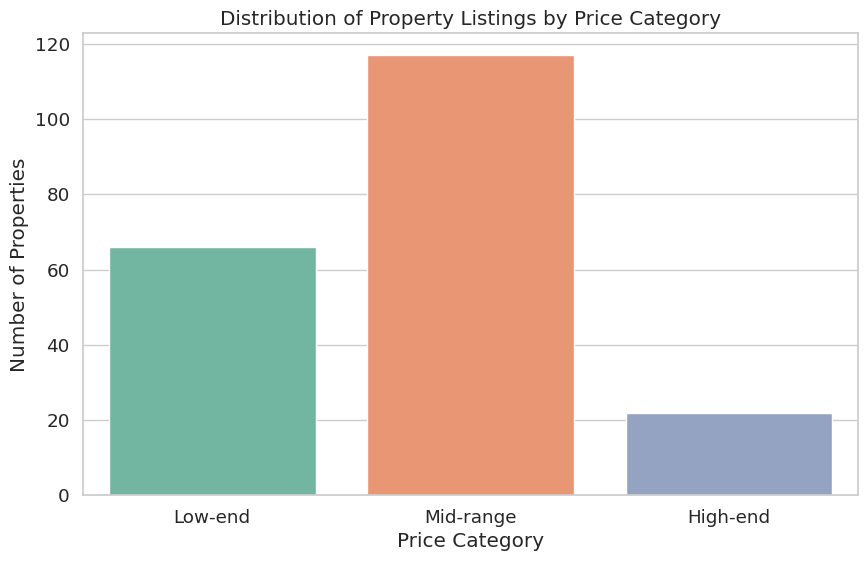

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PriceCategory', order=['Low-end', 'Mid-range', 'High-end'], palette='Set2')
plt.title("Distribution of Property Listings by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Number of Properties")
plt.show()


# **Key Insights (Mid-Range Dominance)**
**Affordable Comfort is in Demand**
The dominance of mid-range listings suggests that most buyers or renters are seeking a balance between affordability and quality. These properties likely offer decent amenities, better locations than low-end homes, but aren’t as luxurious or expensive as high-end options.

**Target Demographic**
This pricing category appeals mostly to:

Middle-income earners

Young professionals

Small families

First-time homebuyers or renters

**Market Saturation**
A large number of mid-range listings could imply intense competition among sellers and agents in this segment. Standing out requires better marketing, pricing, or added value (like furnishings or services).

# **Business Suggestions**
**For Real Estate Agents & Agencies**
Focus marketing efforts on mid-income buyers—highlighting value-for-money features like proximity to schools, transport, and security.

Offer flexible payment plans or mortgage assistance, which is attractive to this income bracket.

Use virtual tours and better photography to stand out in a crowded mid-range market.

**For Developers**
Double down on mid-range housing, especially in fast-developing areas of Lagos like Ajah, Sangotedo, or Ikorodu with improving infrastructure.

Consider build-to-rent models, which attract stable rental income from mid-tier tenants.

**For Investors**
The mid-range market offers steady rental yields and higher turnover than high-end properties.

**Long-term value:** Areas with many mid-range properties often become investment hotspots as infrastructure improves.

**For Platform Owners / Analysts**
Personalize platform recommendations for users based on their browsing and search patterns in the mid-range.

Introduce filters and alerts for "best deals" in the mid-range bracket to retain traffic and improve engagement.